In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



In [16]:
# Specify the path to the CSV file
file_path = '/kaggle/input/first-100000-prime-numbers/output.csv'

# Read the dataset into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())
print(data.info())

   Rank  Num  Interval
0     1    2         2
1     2    3         1
2     3    5         2
3     4    7         2
4     5   11         4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   Rank      100001 non-null  int64
 1   Num       100001 non-null  int64
 2   Interval  100001 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB
None


In [17]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Check for duplicates
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:")
print(duplicate_rows)

Missing values in each column:
Rank        0
Num         0
Interval    0
dtype: int64
Number of duplicate rows:
0


In [18]:
# Generating a descriptive statistical summary
statistical_summary = data.describe()
print("Statistical Summary of the Data:")
print(statistical_summary)

# Additional statistical metrics like skewness and kurtosis
skewness = data.skew()
kurtosis = data.kurtosis()
print("Skewness of the Data:")
print(skewness)
print("Kurtosis of the Data:")
print(kurtosis)



Statistical Summary of the Data:
                Rank           Num       Interval
count  100001.000000  1.000010e+05  100001.000000
mean    50001.000000  6.226138e+05      12.997080
std     28867.946472  3.806316e+05      10.584445
min         1.000000  2.000000e+00       1.000000
25%     25001.000000  2.871370e+05       6.000000
50%     50001.000000  6.119570e+05      10.000000
75%     75001.000000  9.511930e+05      18.000000
max    100001.000000  1.299721e+06     114.000000
Skewness of the Data:
Rank        0.000000
Num         0.070304
Interval    1.809482
dtype: float64
Kurtosis of the Data:
Rank       -1.200000
Num        -1.215135
Interval    4.927946
dtype: float64


Correlation Matrix:
              Rank       Num  Interval
Rank      1.000000  0.999622  0.089195
Num       0.999622  1.000000  0.087935
Interval  0.089195  0.087935  1.000000
Detailed Statistical Analysis:
              skew  kurtosis
Rank      0.000000 -1.200000
Num       0.070304 -1.215135
Interval  1.809482  4.927946


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


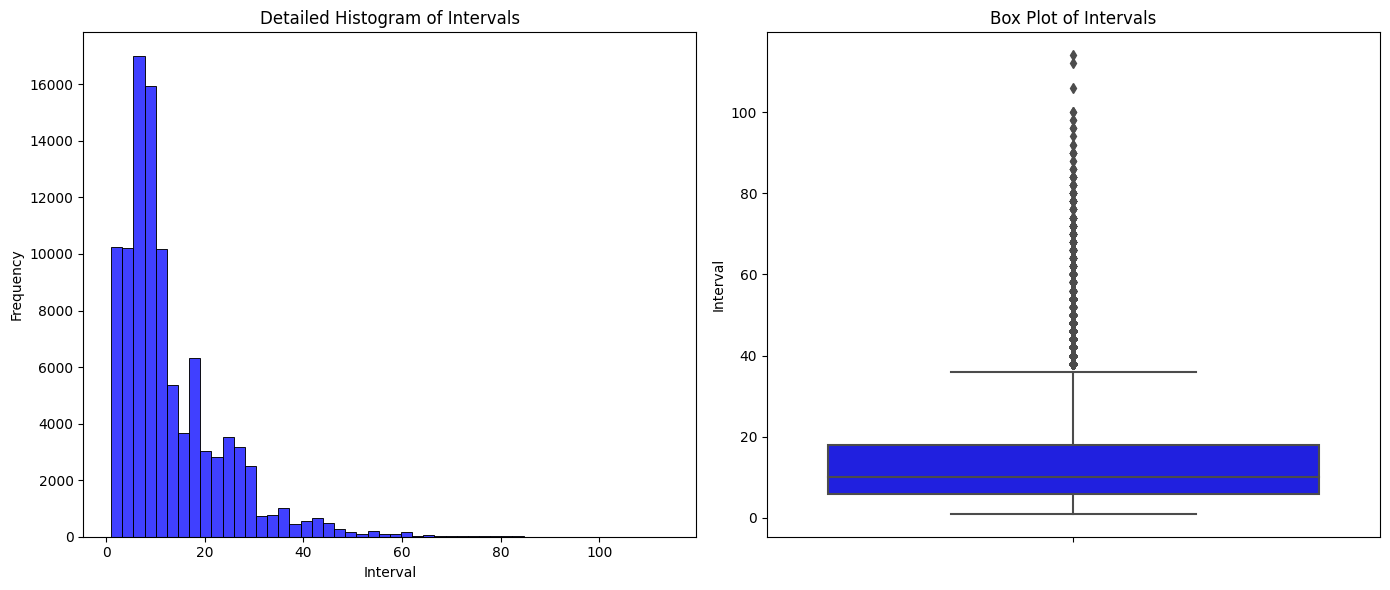

In [19]:
# Generate a correlation matrix
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Calculate additional detailed statistics (skewness and kurtosis)
detailed_stats = data.agg(['skew', 'kurtosis']).transpose()
print("Detailed Statistical Analysis:")
print(detailed_stats)

# Visualizing the distribution of 'Interval' with histograms and box plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for 'Interval'
sns.histplot(data['Interval'], bins=50, ax=ax[0], color='blue')
ax[0].set_title('Detailed Histogram of Intervals')
ax[0].set_xlabel('Interval')
ax[0].set_ylabel('Frequency')

# Box plot for 'Interval'
sns.boxplot(y=data['Interval'], ax=ax[1], color='blue')
ax[1].set_title('Box Plot of Intervals')
ax[1].set_ylabel('Interval')

plt.tight_layout()
plt.show()



In [20]:
#Feature Engineering
# Adding a logarithmic transformation of the 'Interval' due to its skewness
data['Log_Interval'] = np.log(data['Interval'] + 1)  # Add 1 to avoid log(0)

# Rolling statistical features
window_size = 10  # window size for the rolling computation
data['Rolling_Mean_Interval'] = data['Interval'].rolling(window=window_size).mean().fillna(method='bfill')
data['Rolling_Std_Interval'] = data['Interval'].rolling(window=window_size).std().fillna(method='bfill')

# Exponential Moving Average of the intervals to capture trends more smoothly
data['EMA_Interval'] = data['Interval'].ewm(span=window_size, adjust=False).mean()

# Differences and shifts
data['Prev_Num'] = data['Num'].shift(1).fillna(method='bfill')  # Previous prime number
data['Interval_Diff'] = data['Interval'].diff().fillna(method='bfill')  # Change in intervals



/tmp/ipykernel_33/2587448525.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Rolling_Mean_Interval'] = data['Interval'].rolling(window=window_size).mean().fillna(method='bfill')
/tmp/ipykernel_33/2587448525.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Rolling_Std_Interval'] = data['Interval'].rolling(window=window_size).std().fillna(method='bfill')
/tmp/ipykernel_33/2587448525.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Prev_Num'] = data['Num'].shift(1).fillna(method='bfill')  # Previous prime number
/tmp/ipykernel_33/2587448525.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Interval_Dif

In [21]:
# Define features and target variable
X = data.drop(['Num'], axis=1)  # Assume 'Num' is the target variable
y = data['Num']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [23]:
# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 248.07094757261518
R^2 Score: 0.9999999982703944


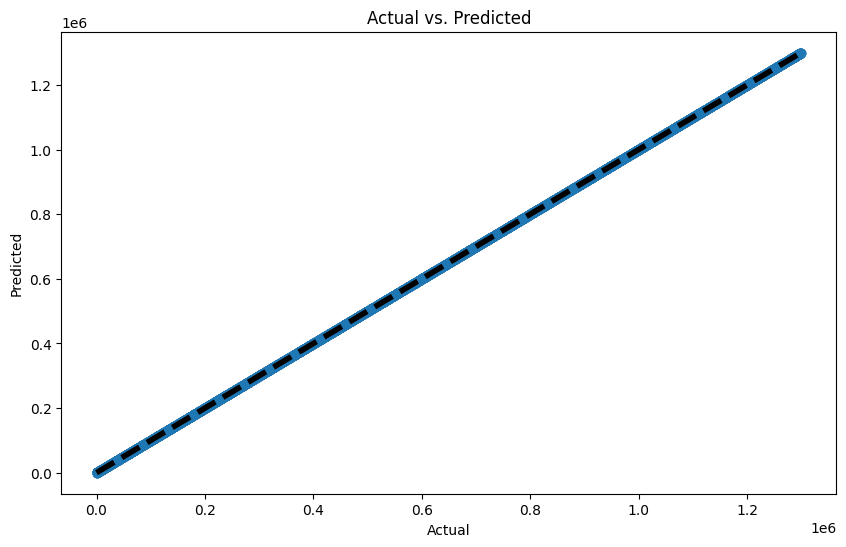

In [28]:


# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()
